In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/1SJulioS1/Machine_learning/main/Datasets/Datasets/Pima%20Indians%20Diabetes/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

According to the information provided by the DataFrame and the Kaggle link where the data is hosted, the measured variables are as follows:

Pregnancies: number of pregnancies
Glucose: plasma glucose concentration at 2 hours in an oral glucose tolerance test
Blood Pressure: diastolic blood pressure (mm Hg)
Skin Thickness: thickness of the triceps skinfold (mm)
Insulin: 2-hour serum insulin (mu U/ml)
BMI: body mass index ((weight in kg)/(height in m^2))
Diabetes Pedigree Function: assesses the probability of diabetes based on family history
Age
Outcome: 1 if diabetes is present, 0 otherwise

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


A total of 768 measurements are taken for each of the variables. As shown in the analysis, there are no missing data.

The goal is to understand the distribution of diabetes cases in the analyzed population.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

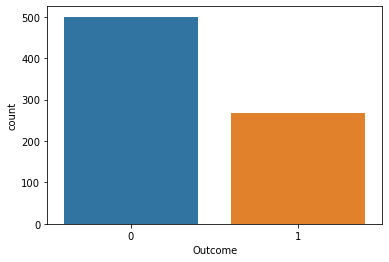

In [7]:
sb.countplot(x='Outcome',data=df)

In [8]:
df.Outcome.value_counts().reset_index()

,index,Outcome
0,0,500
1,1,268


There are a total of 768 cases, out of which 500 do not have diabetes, and 268 are affected by the disease.






# Descriptive Analysis and Data Cleaning






In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Despite the completeness of values regarding the absence of NaN, there are inconsistencies in the following variables:

Glucose: It's impossible for a person to have a blood glucose level of 0, as it would cause insulin shock or hypoglycemia.
Body Mass Index (BMI): It's impossible for this metric to be 0, as the person's weight would be 0.
Blood Pressure: It's impossible for a person to have a blood pressure of 0.
Skin Thickness: For normal individuals, this metric cannot be lower than 10mm, let alone equal to 0mm.

In [10]:
(df.Glucose==0).sum(),(df.BloodPressure==0).sum(),(df.SkinThickness==0).sum(),(df.Insulin==0).sum(),(df.BMI==0).sum()

(5, 35, 227, 374, 11)

Due to the aforementioned inconsistency, it has been decided to remove rows with a significant number of values equal to zero. This will be done for the "Skin Thickness" and "Insulin" columns. For the "Glucose" and "Body Mass Index (BMI)" columns, imputation will be performed using the mean of the values due to the small amount of missing values.

In [11]:
drop_Skin = df.index[df.SkinThickness==0].tolist()
drop_Ins = df.index[df.Insulin==0].tolist()
drop_rows = drop_Ins+drop_Skin
df = df.drop(df.index[drop_rows])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.8 KB


In [12]:
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].median())
df["BMI"] = df["BMI"].replace(0, df["BMI"].median())

In [ ]:
(df.Glucose==0).sum(),(df.BloodPressure==0).sum(),(df.SkinThickness==0).sum(),(df.Insulin==0).sum(),(df.BMI==0).sum()

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.606599,70.654822,29.106599,155.548223,33.072843,0.525543,30.814721,0.329949
std,3.209635,30.783576,12.469919,10.504273,118.775855,7.015007,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After data cleaning, the following observations become evident:



* The age of the analyzed population ranges between 21 and 81 years, with an average of 30.
* Generally, the population had some pregnancies, as indicated by an average of around 3.
* The glucose factor in the population was higher than the estimated mean glucose value, which is typically around 70 mg/dL according to studies. This variable will be further analyzed, demonstrating its strong relationship with the presence of the disease.
* Overall, insulin levels are higher than the average values in studies, which suggest between 60-100 mg/dL and 140 mg/dL or less after meals and snacks.

# Variable Analysis

For each of the variables, we will observe the distribution of the number of individuals who have the disease, contrasted with the analyzed variable.



## Pregnacy


In [14]:
a = df.Pregnancies.value_counts().sort_index()
a

0     57
1     94
2     64
3     45
4     27
5     21
6     19
7     20
8     14
9     11
10     6
11     5
12     5
13     3
14     1
15     1
17     1
Name: Pregnancies, dtype: int64

The range of the number of pregnancies is limited between 0 and 17, excluding 16 pregnancies which are not present in the dataset.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

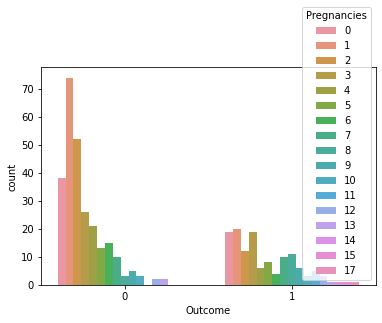

In [15]:
sb.countplot(x='Outcome',hue='Pregnancies',data=df)

Based on the obtained results, it is necessary to consider the number of pregnancies to determine whether a person has the disease or not.






## Glucose

In [16]:
a = df.Glucose.value_counts().sort_index()
a

56     1
68     3
71     2
74     3
75     1
      ..
193    1
195    1
196    2
197    2
198    1
Name: Glucose, Length: 117, dtype: int64

Several categories for glucose measurement exist in the dataset, making direct visualization challenging. To analyze this variable, grouping of values is performed to visualize the disease distribution more effectively.






In [17]:
has_diabetes = df[df['Outcome'] == 1] 
has_no_diabetes = df[df['Outcome']==0]

C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


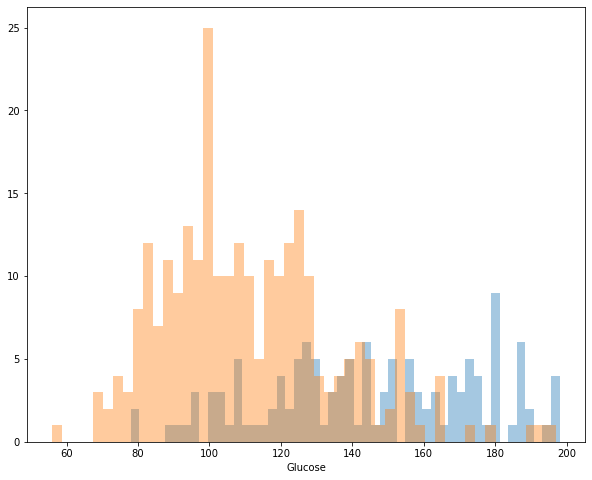

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['Glucose'],bins=50,kde=False) 
ax = sb.distplot(has_no_diabetes['Glucose'],bins=50,kde=False) 
plt.show()

It can be observed that blood glucose levels are evidently closely related to the presence of diabetes.






## Blood Pressure

In [19]:
a = df.BloodPressure.value_counts().sort_index()
a

24      1
30      2
38      1
40      1
44      3
46      2
48      3
50     10
52      6
54      8
56      8
58     18
60     20
62     19
64     28
65      2
66     15
68     24
70     31
72     23
74     31
76     20
78     23
80     17
82     17
84     11
85      2
86     11
88     15
90     11
92      1
94      2
98      1
100     2
102     1
106     2
110     2
Name: BloodPressure, dtype: int64

Similarly, there are multiple values in this variable, so it's necessary to create ranges to visualize the influence on the presence of the disease.






C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


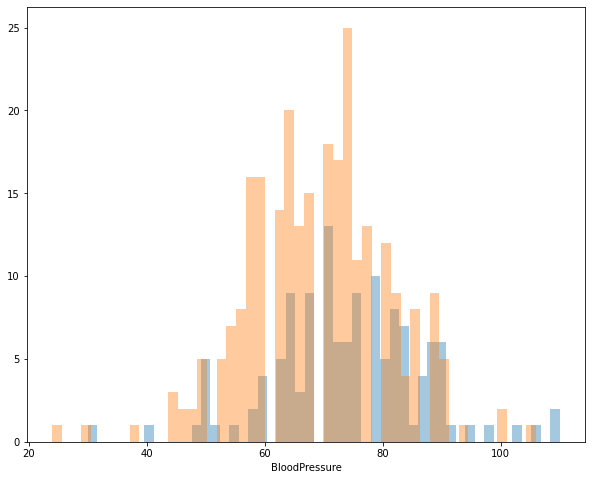

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['BloodPressure'],bins=50,kde=False) 
ax = sb.distplot(has_no_diabetes['BloodPressure'],bins=50,kde=False) 
plt.show()

This variable can be established as a determining factor in deciding whether someone has diabetes or not.






## Skin Thickness

In [21]:
a = df.SkinThickness.value_counts().sort_index()
a

7      2
8      1
10     3
11     5
12     6
13    10
14     6
15    11
16     5
17    10
18    16
19    12
20     8
21     8
22     9
23    17
24     8
25    12
26    14
27    14
28    13
29    14
30    18
31     8
32    20
33    17
34     8
35    11
36     9
37    11
38     3
39    12
40    10
41    12
42     9
43     5
44     4
45     6
46     7
47     4
48     4
49     3
50     3
51     1
52     2
56     1
60     1
63     1
Name: SkinThickness, dtype: int64

The same procedure is carried out for the existing categories in this variable.






C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


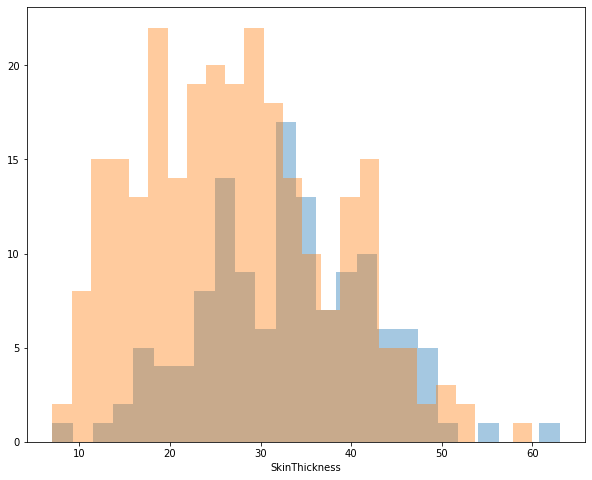

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['SkinThickness'],bins=25,kde=False) 
ax = sb.distplot(has_no_diabetes['SkinThickness'],bins=25,kde=False) 
plt.show()

Although there is a general similarity in the pattern, specific ranges show differences in determining the presence of the disease. This suggests that adding this variable to the analysis may contribute valuable insights.






## Insulin

In [23]:
a = df.Insulin.value_counts().sort_index()
a

7      2
8      1
10     3
11     5
12     6
13    10
14     6
15    11
16     5
17    10
18    16
19    12
20     8
21     8
22     9
23    17
24     8
25    12
26    14
27    14
28    13
29    14
30    18
31     8
32    20
33    17
34     8
35    11
36     9
37    11
38     3
39    12
40    10
41    12
42     9
43     5
44     4
45     6
46     7
47     4
48     4
49     3
50     3
51     1
52     2
56     1
60     1
63     1
Name: SkinThickness, dtype: int64

The same procedure is carried out for the variety of values it presents.






C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


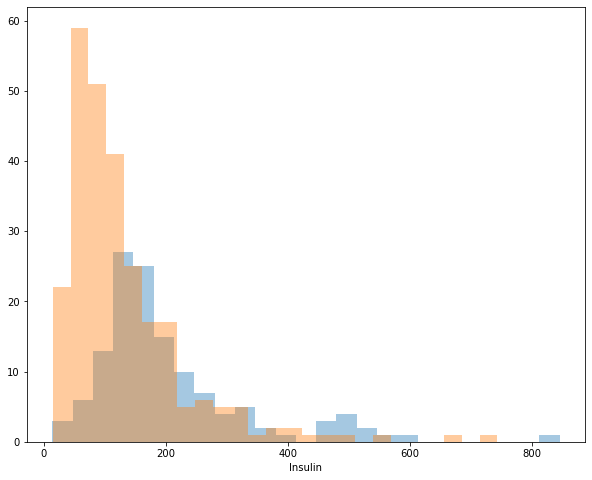

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['Insulin'],bins=25,kde=False) 
ax = sb.distplot(has_no_diabetes['Insulin'],bins=25,kde=False) 
plt.show()

Despite having a similar behavior in certain ranges, a different pattern can be observed in others. Due to this, it's necessary to take it into consideration.






## BMI

In [25]:
a = df.BMI.value_counts().sort_index()
a

18.2    1
19.3    1
19.4    1
19.5    2
19.6    2
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 194, dtype: int64

Due to the variety of measurements in this variable, the same procedure is carried out.

C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


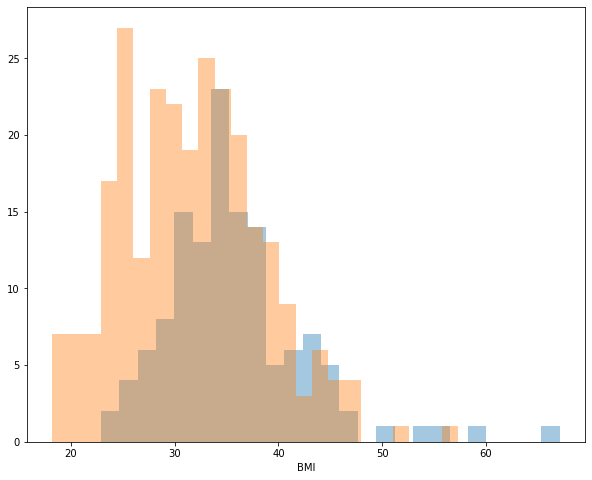

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['BMI'],bins=25,kde=False) 
ax = sb.distplot(has_no_diabetes['BMI'],bins=25,kde=False) 
plt.show()

As distinct results are observed for certain ranges in relation to the presence or absence of the disease, it would be prudent to include this variable for analysis.






## Diabetes Pedigree Function

In [27]:
a = df.DiabetesPedigreeFunction.value_counts().sort_index()
a

0.085    1
0.088    1
0.089    1
0.101    1
0.107    1
        ..
1.731    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 332, dtype: int64

Given the diversity of values, the dataset is discretized using ranges, as has been done so far.






C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


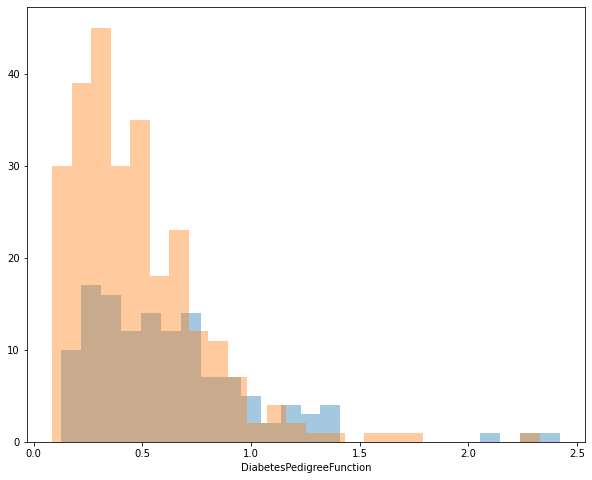

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['DiabetesPedigreeFunction'],bins=25,kde=False) 
ax = sb.distplot(has_no_diabetes['DiabetesPedigreeFunction'],bins=25,kde=False) 
plt.show()

It is evident that this variable plays a significant role in the presence or absence of the disease.






## Age

In [29]:
a = df.Age.value_counts().sort_index()
a

21    35
22    43
23    28
24    31
25    30
26    24
27    14
28    21
29    14
30    10
31    12
32     6
33    11
34     8
35     6
36     7
37     8
38     3
39     7
40     6
41     5
42     7
43     9
44     1
45     4
46     6
47     3
48     3
49     2
50     2
51     6
52     2
53     3
54     2
55     2
56     1
57     2
58     4
59     1
60     2
61     1
63     1
81     1
Name: Age, dtype: int64

As the variable has a wide range of values, discretizing it into intervals is necessary.






C:\Users\siles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


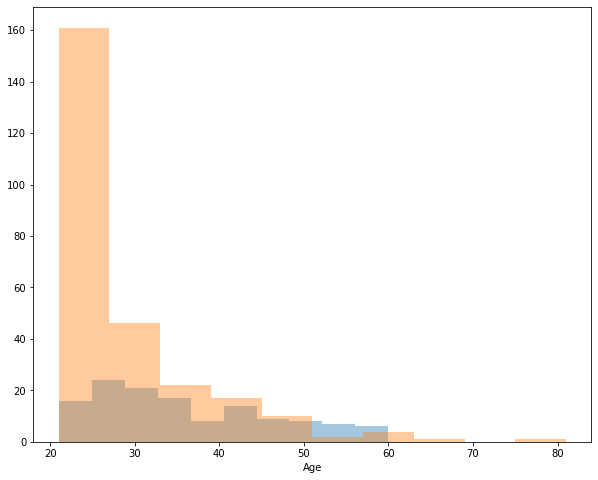

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sb.distplot(has_diabetes['Age'],bins=10,kde=False) 
ax = sb.distplot(has_no_diabetes['Age'],bins=10,kde=False) 
plt.show()

And finally, this variable could also play a significant role in the analysis.






## Heatmap

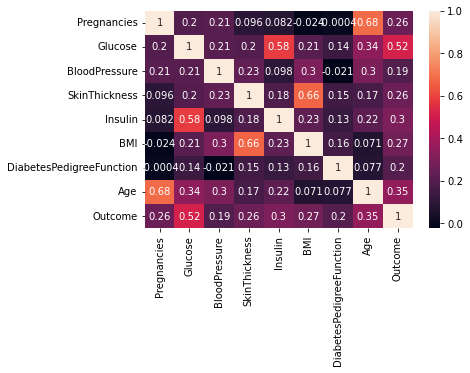

In [31]:
sb.heatmap(df.corr(),annot = True);

Based on the analysis of all the considered variables, it is proposed to retain all the variables for the analysis.







# Standarization


Before proceeding with the modeling, it's important to standardize the variables. Standardization transforms the variables to have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

In [32]:
from sklearn.preprocessing import StandardScaler
columns = list(df.columns)[:8]
Y = pd.DataFrame(df['Outcome'])
X = df.iloc[:,:8]

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.713386,-1.093094,-0.373759,-0.582083,-0.518847,-0.709788,-1.025340,-0.963548
1,-1.025344,0.468162,-2.461427,0.561761,0.104968,1.431204,5.040165,0.214537
2,-0.089470,-1.450881,-1.658478,0.275800,-0.569426,-0.295863,-0.793701,-0.472679
3,-0.401428,2.419732,-0.052579,1.514965,3.266189,-0.367229,-1.051077,2.178012
4,-0.713386,2.159522,-0.855528,-0.582083,5.820456,-0.424322,-0.364740,2.767055
...,...,...,...,...,...,...,...,...
389,-1.025344,1.899313,1.392730,1.419645,2.988002,1.459751,-0.868054,-0.472679
390,-0.713386,0.175427,1.392730,0.943043,-0.383968,0.489168,1.519828,0.607232
391,-0.401428,-1.125620,-1.016118,-0.296122,-1.176381,-0.666968,0.687644,-0.865374
392,2.094236,-0.702780,0.429191,1.800926,0.206127,-0.024670,-1.013901,3.159750


# Data Splitting

To train and evaluate our model, we will split the dataset into training and testing sets. We will use 80% of the data for training and reserve 20% for testing.


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,                                               
                                                    random_state=1,stratify=Y)
y_test = y_test.to_numpy()[:,0]
print('Labels counts in y:', np.bincount(Y.to_numpy()[:,0]))
print('Labels counts in y_train:', np.bincount(y_train.to_numpy()[:,0]))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [264 130]
Labels counts in y_train: [211 104]
Labels counts in y_test: [53 26]


# Predictions using Perceptron

In [34]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 25
Accuracy: 0.684


C:\Users\siles\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.0001, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 25
Accuracy: 0.684


C:\Users\siles\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.000001, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 25
Accuracy: 0.684


C:\Users\siles\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Predictions using AdalineGD

In [37]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Text(0.5, 1.0, 'Adaline - Learning rate 0.00001')

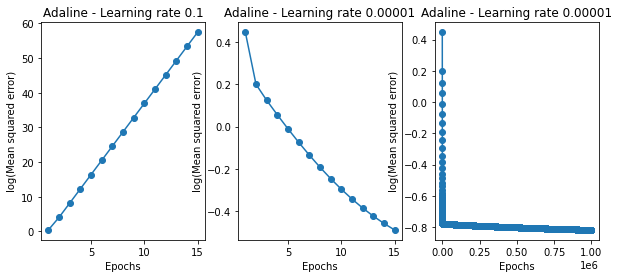

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.001).fit(X_train.to_numpy(), y_train["Outcome"].to_numpy())
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.00001).fit(X_train.to_numpy(), y_train["Outcome"].to_numpy())
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - Learning rate 0.00001')


ada3 = AdalineGD(n_iter=1000000, eta=0.00001).fit(X_train.to_numpy(), y_train["Outcome"].to_numpy())
ax[2].plot(range(1, len(ada3.losses_) + 1), np.log10(ada3.losses_), marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('log(Mean squared error)')
ax[2].set_title('Adaline - Learning rate 0.00001')


The Adaline (Adaptive Linear Neuron) model is employed with different hyperparameter values to assess convergence behavior:

For eta = 0.001, divergence is visually demonstrated, indicating the need to opt for a smaller value.

For the remaining eta values assigned to the model, convergence is observed, rendering them suitable for training.

In [39]:
prediction = ada2.predict(X_test.to_numpy())
#print(y_test.shape)
print('Misclassified examples: %d' % (y_test != prediction).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,prediction))

Misclassified examples: 26
Accuracy: 0.671


In [40]:
prediction = ada3.predict(X_test.to_numpy())
#print(y_test.shape)
print('Misclassified examples: %d' % (y_test != prediction).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,prediction))

Misclassified examples: 22
Accuracy: 0.722



The best result from hyperparameter tuning and the overall model of the study yielded an accuracy of 0.722. There were 22 misclassified instances in the test set. This achievement was accomplished with 1,000,000 epochs and a learning rate (eta) of 0.00001.